In [159]:
# import Libraries

import pandas as pd

In [160]:
df = pd.read_csv(r'C:\Users\Lenovo\Downloads\Bankloan - Logistic\bankloan.csv')

In [161]:
df.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## About the Dataset :


About this file

File contains 14 columns and 5000 rows. Description of the columns are as follows:

ID: Customer ID

Age : Customer Age

Experience : Customer Experience

Income : Income of the Customer

ZipCode: Customer's residence zipcode

Family : No of Family members of the customer

CCAvg: Credit Card Average Score

Education: Education of the customer

Mortgage: Mortgage taken or not taken by the customer



DATASET: Dependent variable is 'Personal.Loan'. 0 indicates loan not approved and 1 indicates loan approved.


OBJECTIVE : We will do Exploratory Data Analysis and use Logistic Regression, Decision Tree, Random Forest and AUC to find out which is the best model.

In [162]:
df.sample(5)

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
2297,2298,59,35,31,94063,3,0.4,2,0,0,0,0,1,1
3837,3838,44,19,40,92350,4,0.0,2,0,0,0,0,1,0
4158,4159,59,34,74,92780,4,0.7,1,0,0,0,0,1,1
938,939,62,37,19,95818,4,0.4,2,124,0,1,0,0,0
2699,2700,37,11,22,90035,3,0.1,2,114,0,0,0,0,0


#### Understanding the dataset:

In [163]:
df.size

70000

In [ ]:
df.shape

(5000, 14)

In [ ]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
df.corr()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP.Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal.Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


### Cleaning the data

In [ ]:
## Id and Zip code has no  effect on the result:

df.drop(columns=["ID", "ZIP.Code"], axis=1, inplace=True)

In [ ]:
## Removing the outliers in the Income column:

q1 = df["Income"].quantile(0.25)

q3 = df["Income"].quantile(0.75)

iqr = q3-q1

In [ ]:
min_range = q1 + 1.5*iqr

In [ ]:
max_range = q3 - 1.5*iqr

In [ ]:
df = df[(df["Income"] <= min_range) & (df["Income"] >= max_range)]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Income'>

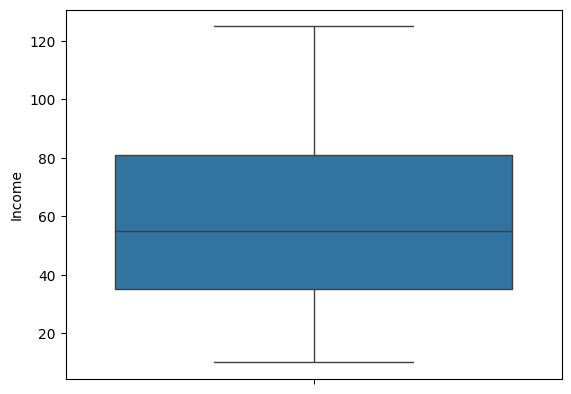

In [ ]:
sns.boxplot(df["Income"])

<Axes: ylabel='CCAvg'>

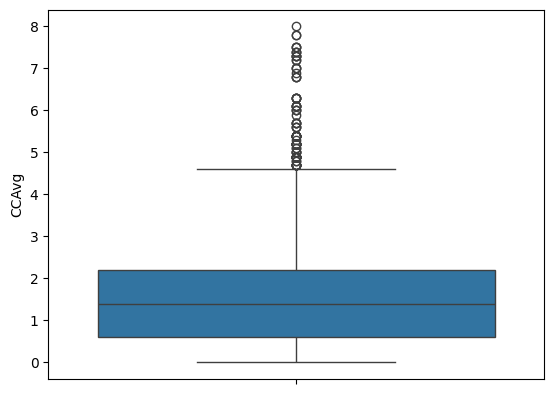

In [ ]:
sns.boxplot(df["CCAvg"])

In [ ]:
## Remove the outliers of CCAvg:- 

q1 = df["CCAvg"].quantile(0.25)
q3 = df["CCAvg"].quantile(0.75)

iqr = q3-q1

mini = q1 + 1.5*iqr
maxi = q3 - 1.5*iqr

df = df[(df["CCAvg"] <= mini) & (df["CCAvg"] >= maxi)]


<Axes: ylabel='CCAvg'>

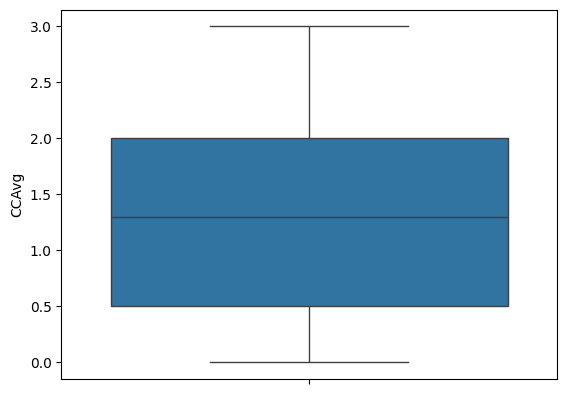

In [ ]:
sns.boxplot(df["CCAvg"])

<Axes: ylabel='Mortgage'>

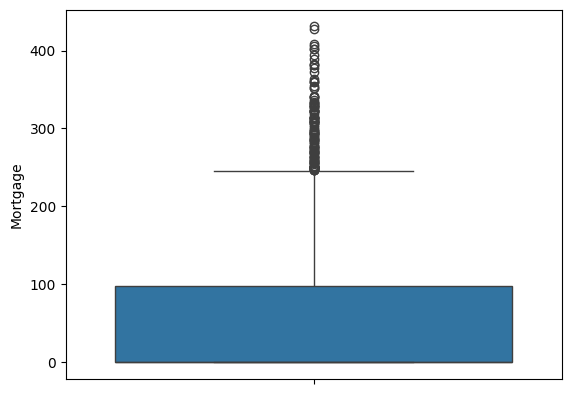

In [ ]:
sns.boxplot(df["Mortgage"])

In [ ]:
df.shape

(3819, 12)

<Axes: ylabel='Income'>

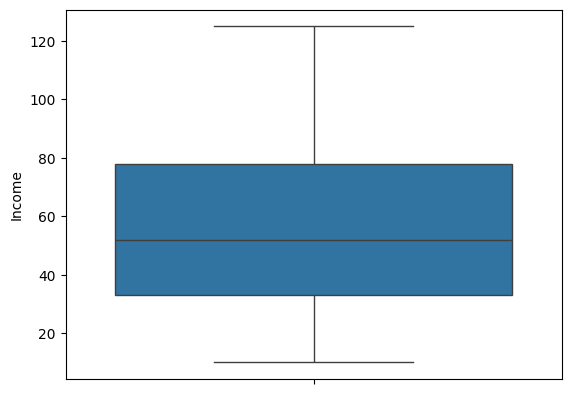

In [ ]:
sns.boxplot(df["Income"])

In [ ]:
backup1 = df.to_csv("Clean df")

### Data Visualization:-

<Axes: >

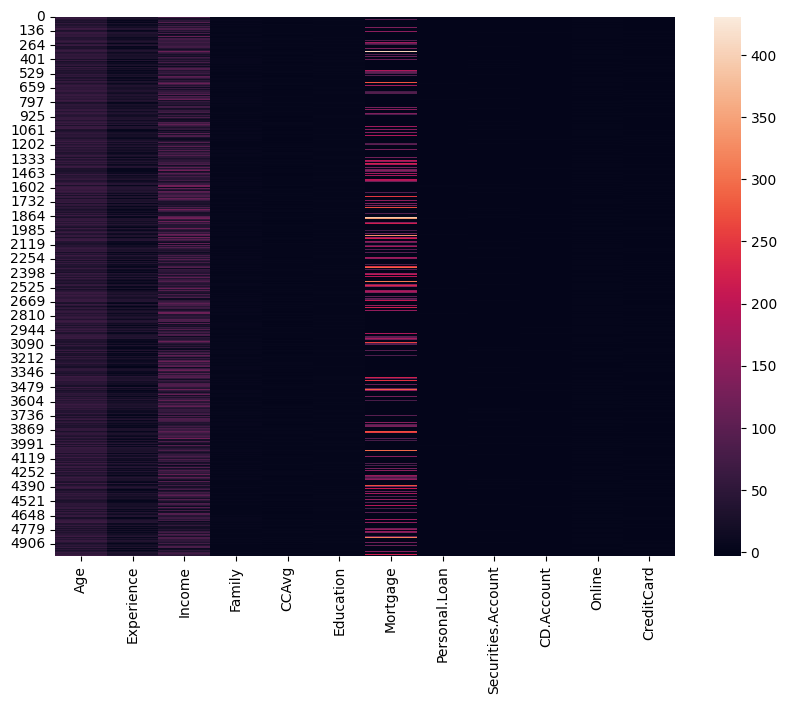

In [ ]:
## Finding the correlation :-

plt.figure(figsize=(10,7))
sns.heatmap(df)

<Axes: ylabel='CreditCard'>

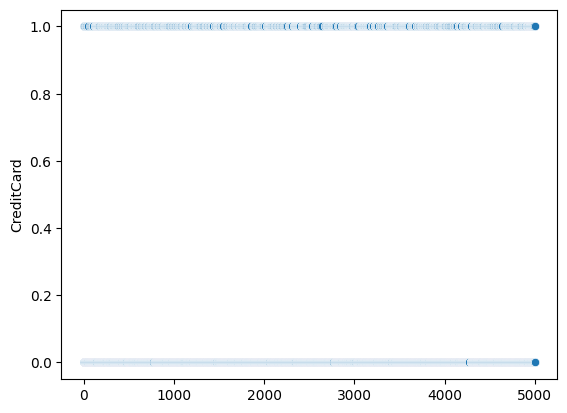

In [ ]:
sns.scatterplot(df["CreditCard"])

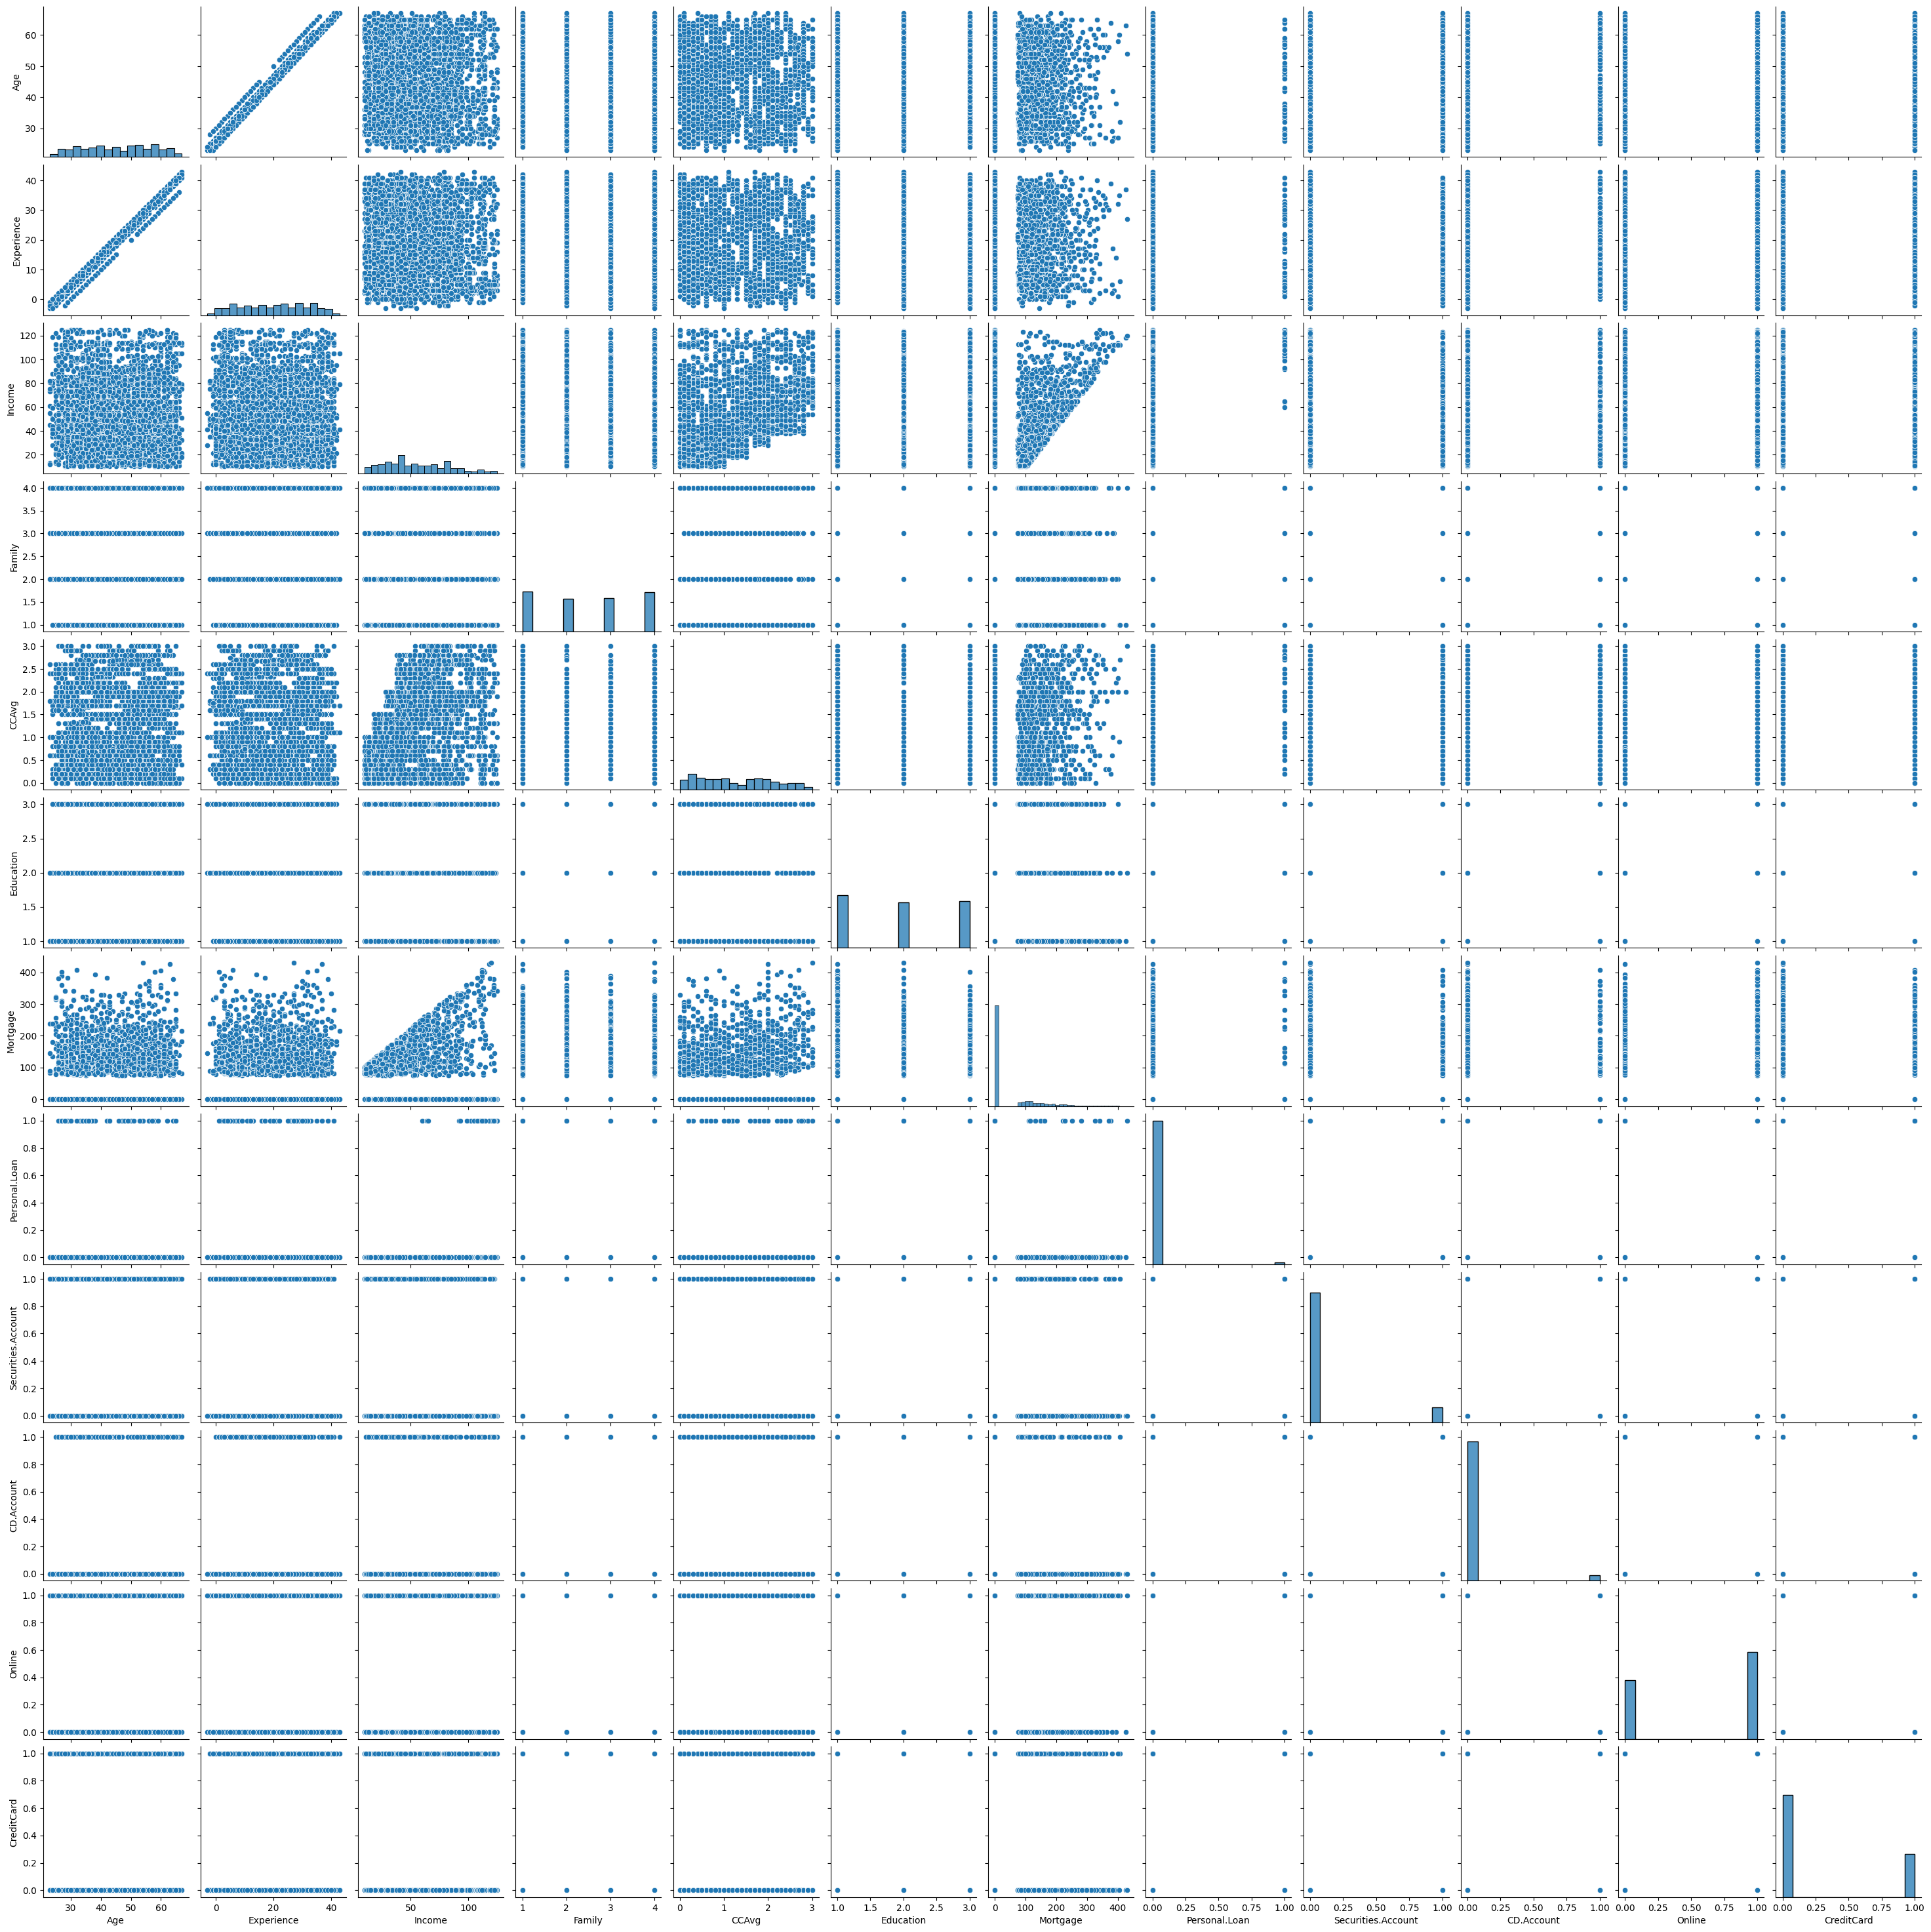

In [ ]:
sns.pairplot(df)

#### It is the classification problem, so, now we built our model by Logistic Regression, DecisionTree, RandomForest

## Model Building

In [ ]:
X = df.drop(["CreditCard"], axis=1)

In [ ]:
y = df["CreditCard"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Perform grid search
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best Accuracy: 0.7361702127659575


In [ ]:
# Train a new model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=300)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
lgr = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

In [ ]:
lgr.fit(X_train, y_train)

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

### Checking the accuracy of the model :- 

In [ ]:
print("Training accuracy of Lgr :- ", lgr.score(X_train, y_train)*100 , "Testing accuracy of Lgr :- ", lgr.score(X_test, y_test)*100)
print("Training accuracy of Dtc :- ", dtc.score(X_train, y_train)*100 , "Testing accuracy of Dtc :- ", dtc.score(X_test, y_test)*100)
print("Training accuracy of Rfc :- ", rfc.score(X_train, y_train)*100 , "Testing accuracy of Rfc :- ", rfc.score(X_test, y_test)*100)

Training accuracy of Lgr :-  73.58428805237315 Testing accuracy of Lgr :-  72.25130890052355
Training accuracy of Dtc :-  99.63993453355155 Testing accuracy of Dtc :-  58.63874345549738
Training accuracy of Rfc :-  99.63993453355155 Testing accuracy of Rfc :-  68.717277486911


### Increase the accuracy of the model :-

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=40, min_samples_split=10, min_samples_leaf=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=40, min_samples_leaf=5, min_samples_split=10)

In [ ]:
model.score(X_train, y_train)*100 , model.score(X_test, y_test)*100

(82.48772504091653, 59.81675392670157)

In [ ]:
model = RandomForestClassifier(n_estimators=100, max_depth=40, min_samples_split=6, min_samples_leaf=2)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=40, min_samples_leaf=2, min_samples_split=6)

In [ ]:
model.score(X_train, y_train)*100 , model.score(X_test, y_test)*100

(88.01963993453356, 70.54973821989529)

In [ ]:
y_pred = rfc.predict(X_test)

## Confusion Matrix :-

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confu = confusion_matrix(y_test, y_pred)
print(confu)

[[487  48]
 [191  38]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy*100)
print("Precision:", precision*100)
print("Recall:", recall*100)
print("F1-score:", f1*100)

Accuracy: 68.717277486911
Precision: 44.18604651162791
Recall: 16.593886462882097
F1-score: 24.126984126984123


### AUC (Area under the curve), ROC

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
y_pred_proba = model.predict_proba(X_test)[:, 1] ## making the probability
y_pred_proba

array([0.206491  , 0.11559912, 0.40816816, 0.11026015, 0.48811158,
       0.20722446, 0.38220158, 0.19032826, 0.25845613, 0.20121781,
       0.21458515, 0.18376306, 0.29731931, 0.60055379, 0.44888667,
       0.33538288, 0.21545409, 0.14550769, 0.10787637, 0.53299226,
       0.20999711, 0.41291717, 0.09766737, 0.44290954, 0.51794644,
       0.24850847, 0.37199996, 0.17779978, 0.14942928, 0.24219676,
       0.25514984, 0.03528571, 0.18442769, 0.34963023, 0.32317928,
       0.39810168, 0.22583528, 0.19454312, 0.3368456 , 0.53980694,
       0.20800943, 0.08461436, 0.24852778, 0.41277075, 0.75213618,
       0.29286298, 0.0605119 , 0.85467244, 0.43680123, 0.49214438,
       0.38051232, 0.24898608, 0.1595402 , 0.33832913, 0.20637344,
       0.36094635, 0.17327296, 0.15960072, 0.25532143, 0.24390713,
       0.10661829, 0.44940683, 0.2354695 , 0.88490873, 0.20179526,
       0.32845128, 0.2372046 , 0.25773271, 0.26955844, 0.33330533,
       0.15826125, 0.40921754, 0.85250794, 0.28229993, 0.25466

In [ ]:
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC Score:", auc*100)

AUC-ROC Score: 57.747214626780384


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

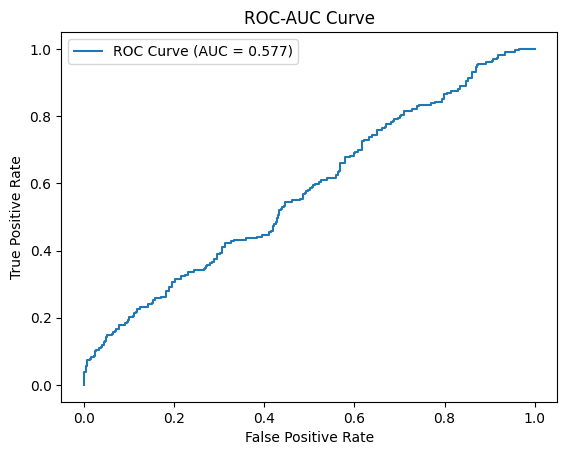

In [ ]:
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.3f})'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()

### Dump the file

In [ ]:
import joblib

In [ ]:
joblib.dump(model, "Bankloan.jb")

['Bankloan.jb']